# Proposta do Curso 💬

Continuação do curso acerca das redes neurais com a biblioteca do Keras. Nesse  notebook, irei entender o que se passa dentro do modelo, entender problemas comuns de pesos e viéses, além de me familiarizar mais com conceitos de deep learning, bem como realizar ajustes antes da etapa de treinamento do modelo.

### Importando as bibliotecas 📚

In [30]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.models import load_model

In [2]:
# Carregando o dataset utilizado:

dataset = keras.datasets.fashion_mnist

In [3]:
# Esse dataset retorna uma tupla, com matrizes referentes
# às imagens e aos rótulos que se relacionam às imagens.

# As imagens podem ser entendidas como as variáveis explicativas,
# enquanto que os rótulos às variáveis respostas, então irei
# segmentar o código em x e em y:

# X : refere-se às imagens
# y : refere-se aos rótulos

((X_train, y_train), (X_test, y_test)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Visualizando o conjunto dos dados 🔎

In [4]:
print(f"Formato das imagens para treino: {(X_train).shape}")
print(f"Formato dos rótulos para treino: {(y_train).shape}")

print("")

print(f"Formato das imagens para teste: {(X_test).shape}")
print(f"Formato dos rótulos para teste: {(y_test).shape}")

Formato das imagens para treino: (60000, 28, 28)
Formato dos rótulos para treino: (60000,)

Formato das imagens para teste: (10000, 28, 28)
Formato dos rótulos para teste: (10000,)


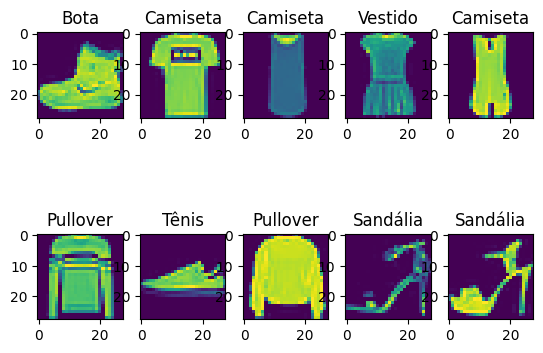

In [5]:
total_classificacoes = 10

nome_categorias = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa',
                   'Tênis', 'Bolsa', 'Bota']

for imagem in range(total_classificacoes):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(X_train[imagem])
  plt.title(nome_categorias[y_train[imagem]])

**Normalizando as imagens**, para que diminua a sua amplitude, buscando aumentar a precisão do modelo 📏

In [6]:
X_train = X_train / float(255)

### Criando o modelo 🤖

In [7]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),                                    # Dropout garante que 20% dos neurônios da camada escondida sejam desligados, dimimnuindo desse modo o overfit
    keras.layers.Dense(10, activation = tensorflow.nn.softmax )
])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


historico = modelo.fit(X_train, y_train, epochs = 6,
                       validation_split = 0.2) # validation_split reserva 20% do conjunto de teste para validação


Epoch 1/6
1500/1500 [==============================] - 28s 17ms/step - loss: 0.5278 - accuracy: 0.8143 - val_loss: 0.4357 - val_accuracy: 0.8364
Epoch 2/6
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3990 - accuracy: 0.8555 - val_loss: 0.3866 - val_accuracy: 0.8598
Epoch 3/6
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3664 - accuracy: 0.8653 - val_loss: 0.3667 - val_accuracy: 0.8622
Epoch 4/6
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3410 - accuracy: 0.8755 - val_loss: 0.3479 - val_accuracy: 0.8755
Epoch 5/6
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3273 - accuracy: 0.8791 - val_loss: 0.3227 - val_accuracy: 0.8838
Epoch 6/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3097 - accuracy: 0.8829 - val_loss: 0.3470 - val_accuracy: 0.8747


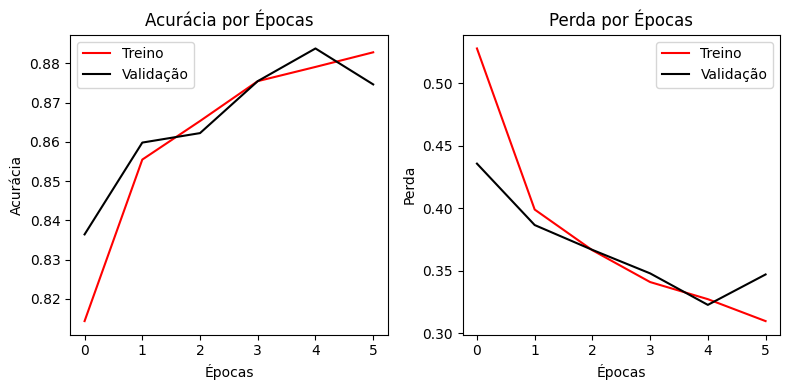

In [8]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotando o gráfico de acurácia
axs[0].plot(historico.history['accuracy'], color='red')
axs[0].plot(historico.history['val_accuracy'], color='black')
axs[0].set_title('Acurácia por Épocas')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['Treino', 'Validação'])

# Plotando o gráfico de perda
axs[1].plot(historico.history['loss'], color='red')
axs[1].plot(historico.history['val_loss'], color='black')
axs[1].set_title('Perda por Épocas')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda')
axs[1].legend(['Treino', 'Validação'])

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

### Estudando o modelo ✒️

In [9]:
# Visualizando o sumário do modelo:

sumario_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observando o sumário do modelo, encontramos as camadas que o compõem, bem como o formato da saída e seus parâmetros. No formato de saída, observamos que cada valor de saída corresponde ao o que fora colocado no modelo, de modo que a entrada se relaciona ao tamanho da imagem (28, 28), as camadas de processamento à quantidade de neurônios colocados e a camada de saída ao número de classficações do nosso dataset.

Porém, observe algo. Na segunda camada, na coluna de parâmetros, temos um valor de 200960. Se realizarmos o produto de 256 por 784, encontraremos um valor de 200704. Assim, o correto seria ser esse valor no de parâmetros, certo, sendo que temos um tipo de camada oculta densa, que se conecta com todos os neurônios do modelo - ainda que sejam posteriormente, 20% deles, adormecidos, visando reduzir o overfit. O que acontece ?

Então, a divergência do esperado para o que é encontrado se dá, pois há algo chamado viés: a medida de distância daquilo que foi previsto pelo modelo, em relação ao que verdadeiro. Ou seja, o viés mensura o quão próxima ou distante foi uma previsão.

Acontece que esse valor, se subtrairmos pelo que seria esperado resulta exatamente em 256, sendo relativo a soma total de cada viés adicionado à cada entrada, uma vez que, como posteriormente verá, na camada de processamento utilizando a função de ativação - no presente caso a reLu - ocorre uma multiplicação dos pesos em relação aos dados de entrada mais o viés :

`camada_dense = [(entrada*pesos) + viés]`


In [10]:
# Visualizando os pesos do modelo:

modelo.layers[1].get_weights()[0]

array([[ 7.1119629e-02,  1.3508628e-01,  4.6737492e-05, ...,
        -1.3106399e-03, -3.9636537e-02, -3.2882977e-02],
       [-1.3775289e-01, -7.8397788e-02, -3.0915268e-02, ...,
         1.1422591e-01, -1.7636560e-01,  1.7544830e-01],
       [-1.7873377e-01, -2.0735782e-01,  4.5814149e-02, ...,
        -6.8059541e-02,  4.8301175e-02,  1.3520357e-01],
       ...,
       [-2.3133296e-01, -6.4237103e-02,  3.4009337e-02, ...,
         3.1762470e-02,  6.9151007e-02,  1.4361715e-01],
       [-4.0063116e-01,  7.2305426e-02, -2.7387081e-02, ...,
         7.4194849e-02,  2.8522903e-01,  7.4265827e-03],
       [-2.5686529e-01,  5.5127893e-02,  5.4588683e-02, ...,
         6.8499155e-02,  2.3151402e-01, -1.9243982e-02]], dtype=float32)

In [11]:
# Visualizando os viéses do modelo:

modelo.layers[1].get_weights()[1]

array([-1.18175931e-01, -1.18161552e-01,  1.21482559e-01, -5.72169991e-03,
        3.06308031e-01, -1.25956850e-03,  9.13050696e-02,  3.35237533e-01,
       -1.56310558e-01, -1.56430781e-01, -1.33009087e-02,  9.22049768e-03,
        1.49773881e-01,  5.09629287e-02,  4.35122311e-01,  1.85372517e-01,
       -1.53900236e-02, -2.12566163e-02, -3.37853357e-02,  1.12059698e-01,
       -2.28808135e-01,  1.46131381e-01, -1.52207026e-02, -3.17646950e-01,
        3.45136672e-01,  5.78999296e-02, -3.87359932e-02,  7.55940676e-02,
        3.37796330e-01,  1.39816537e-01, -1.85533836e-02,  2.32221216e-01,
        3.41196477e-01,  8.57176483e-02,  1.00769468e-01,  3.30049783e-01,
        5.80962114e-02,  1.99373975e-01, -1.01537704e-02,  1.96004540e-01,
        2.91108284e-02, -2.86167622e-01,  9.87360328e-02,  2.13937074e-01,
        1.42410368e-01,  2.76281238e-01, -4.29763384e-02,  2.12785825e-01,
       -2.07809843e-02, -2.08841525e-02,  1.54864103e-01, -1.98887736e-02,
        3.07874143e-01, -

### Selecionando todos os pesos e viéses da primeira camada Dense:

In [12]:
# Selecionando todos os pesos da camada Dense:
pesos_camada_dense = modelo.layers[1].get_weights()[0]

In [13]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]

### Entendendo os viéses 💀

Digamos que eu tenho que classificar uma classe chamada PC e tenho três outras, que são um gato, um videogame e um outro PC. Crio o modelo e o treino, o qual irá receber tais classes em sua etapa de processamento, buscando classificá-las da forma correta.

Digamos que em um neurônio ele diga que o PC corresponde ao gato, em outro ao videogame e em outro ao PC. O quão distante a classificação está do item de interesse ? Digo o quão distante é gato de um PC, ou um videogame e outro PC ?

Notoriamente, a primeira classe é mais distante da classe de referência, enquanto que a segunda é menos, uma vez que ainda que um videogame não seja um PC é um hardware, e, por fim, a distância da terceira é praticamente nula.

É segundo essa distância que o modelo, além dos pesos, reforça a conexão dos neurônios que conseguem realizar uma boa classificação, de modo que o quão mais distante for a distância da classificação maior será o viés, diminuindo conforme essa distância também diminua.

## Entendendo como os pesos implicam no modelo... 🖋️

In [14]:
# Para entender o quão os pesos influem ou não no modelo, irei
# primeiramente zerar todos e depois deixá-los aleatórios.

In [15]:
shape = pesos_camada_dense.shape
shape

(784, 256)

In [16]:
# Zerando os pesos:
pesos_camada_dense_zerados = np.zeros((shape))

# Visualizando a camada de pesos zerada:
pesos_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
# Atribuindo ao modelo os pesos zerados:

# Legenda:
# modelo_zW -> modelos com pesos zero (zW = zero weights)

modelo_zW = modelo

modelo_zW.layers[1].set_weights([pesos_camada_dense_zerados,
                                 vieses_camada_dense])

# Visualizando os novos pesos no modelo:
modelo_zW.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Instanciando o novo modelo criado com os pesos zerados

In [18]:
modelo_zW.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


historico_zW = modelo_zW.fit(X_train, y_train, epochs = 6,
                       validation_split = 0.2) # validation_split reserva 20% do conjunto de teste para validação


Epoch 1/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5294 - accuracy: 0.8073 - val_loss: 0.4368 - val_accuracy: 0.8394
Epoch 2/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4049 - accuracy: 0.8508 - val_loss: 0.3812 - val_accuracy: 0.8615
Epoch 3/6
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3736 - accuracy: 0.8626 - val_loss: 0.3585 - val_accuracy: 0.8702
Epoch 4/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3503 - accuracy: 0.8695 - val_loss: 0.3692 - val_accuracy: 0.8660
Epoch 5/6
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3391 - accuracy: 0.8748 - val_loss: 0.3371 - val_accuracy: 0.8775
Epoch 6/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3202 - accuracy: 0.8803 - val_loss: 0.3230 - val_accuracy: 0.8834


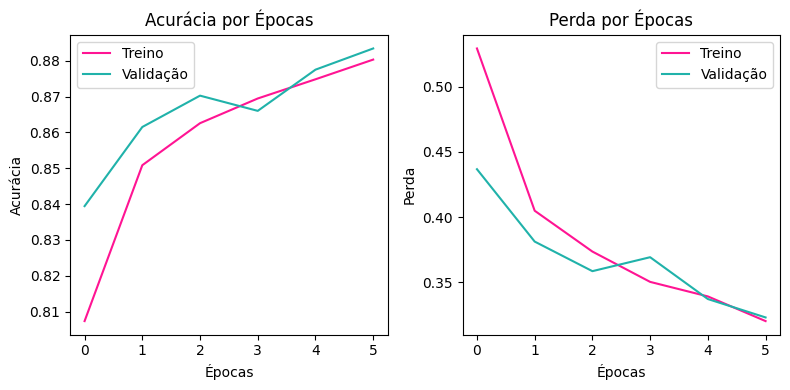

In [19]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotando o gráfico de acurácia
axs[0].plot(historico_zW.history['accuracy'], color='deeppink')
axs[0].plot(historico_zW.history['val_accuracy'], color='lightseagreen')
axs[0].set_title('Acurácia por Épocas')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['Treino', 'Validação'])

# Plotando o gráfico de perda
axs[1].plot(historico_zW.history['loss'], color='deeppink')
axs[1].plot(historico_zW.history['val_loss'], color='lightseagreen')
axs[1].set_title('Perda por Épocas')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda')
axs[1].legend(['Treino', 'Validação'])

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

**Gráfico da acurácia e perda em relação ao primeiro modelo com os pesos não zerados:**

>

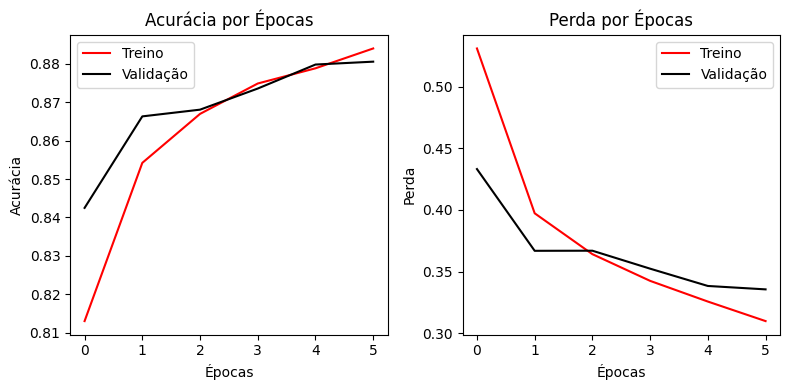

Observando cada um dos gráficos, até o momento, não parece que houve grande discrepância do modelo com os pesos zerados (gráfico 1) e daquele com os pesos não zerados (gráfico 2). Mas por quê ? O que deveríamos esperar ?

Então, na verdade, poderia ser esperado até que o modelo com os pesos zerados apresentasse resultados, ao menos visualmente, inferiores em relação ao modelo com os pesos não zerados, tendo em vista que zerar os pesos significa tirar o recurso que reforça ou "desmotiva" as variáveis que são ou não significativas na previsão do modelo em relação ao resultado, criando assim uma simetria. Desse modo, não há nada que permite às redes compreender quais são ou não as variáveis significativas, deixando-a parcialmente perdida, se considerarmos a presença dos viéses.

Desse modo, a função dos pesos, como já comentado, é reforçar as variáveis significativas, criando desse modo, por meio da sua multiplicação, uma assimetria no modelo.

### Instanciando com os pesos aleatórios

In [20]:
# Aleatoriezando os pesos:
pesos_camada_dense_randomizados = np.random.rand(784, 256)

# Visualizando a camada de pesos zerada:
pesos_camada_dense_randomizados

array([[0.75770936, 0.20767456, 0.82456317, ..., 0.67749192, 0.31832853,
        0.23025887],
       [0.35853141, 0.5844858 , 0.67047349, ..., 0.54131719, 0.49045043,
        0.08575163],
       [0.92820255, 0.45021093, 0.28849529, ..., 0.50217988, 0.2806124 ,
        0.17495696],
       ...,
       [0.66161154, 0.61767043, 0.48312057, ..., 0.61649821, 0.17735052,
        0.57946463],
       [0.86292714, 0.79830248, 0.93622144, ..., 0.98024075, 0.51477718,
        0.25387707],
       [0.02545938, 0.6139133 , 0.47586776, ..., 0.80587397, 0.53424015,
        0.70573262]])

In [21]:
# Atribuindo ao modelo os pesos zerados:

# Legenda:
# modelo_rW -> modelos com pesos aleatórios (rW = random weights)

modelo_rW = modelo

modelo_rW.layers[1].set_weights([pesos_camada_dense_randomizados,
                                 vieses_camada_dense])

# Visualizando os novos pesos no modelo:
modelo_rW.layers[1].get_weights()[0]

array([[0.7577094 , 0.20767456, 0.82456315, ..., 0.6774919 , 0.31832853,
        0.23025887],
       [0.35853142, 0.58448577, 0.6704735 , ..., 0.54131716, 0.49045044,
        0.08575163],
       [0.92820257, 0.45021093, 0.2884953 , ..., 0.50217986, 0.2806124 ,
        0.17495696],
       ...,
       [0.66161156, 0.6176704 , 0.48312056, ..., 0.61649823, 0.17735052,
        0.5794646 ],
       [0.86292714, 0.7983025 , 0.9362214 , ..., 0.98024076, 0.5147772 ,
        0.25387707],
       [0.02545938, 0.6139133 , 0.47586775, ..., 0.805874  , 0.5342401 ,
        0.70573264]], dtype=float32)

In [22]:
modelo_rW.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


historico_rW = modelo_rW.fit(X_train, y_train, epochs = 6,
                       validation_split = 0.2) # validation_split reserva 20% do conjunto de teste para validação


Epoch 1/6
1500/1500 [==============================] - 12s 8ms/step - loss: 130.9385 - accuracy: 0.4116 - val_loss: 15.6418 - val_accuracy: 0.7358
Epoch 2/6
1500/1500 [==============================] - 11s 8ms/step - loss: 34.4845 - accuracy: 0.6351 - val_loss: 10.1551 - val_accuracy: 0.7837
Epoch 3/6
1500/1500 [==============================] - 8s 6ms/step - loss: 16.1046 - accuracy: 0.6996 - val_loss: 7.8944 - val_accuracy: 0.7679
Epoch 4/6
1500/1500 [==============================] - 9s 6ms/step - loss: 7.9301 - accuracy: 0.7371 - val_loss: 4.1521 - val_accuracy: 0.7807
Epoch 5/6
1500/1500 [==============================] - 13s 8ms/step - loss: 4.3486 - accuracy: 0.7543 - val_loss: 3.3115 - val_accuracy: 0.7442
Epoch 6/6
1500/1500 [==============================] - 13s 9ms/step - loss: 2.4794 - accuracy: 0.7739 - val_loss: 1.8889 - val_accuracy: 0.8042


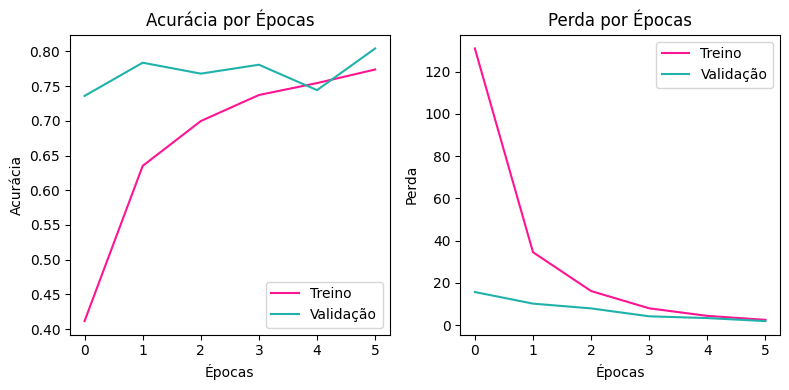

In [23]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotando o gráfico de acurácia
axs[0].plot(historico_rW.history['accuracy'], color='deeppink')
axs[0].plot(historico_rW.history['val_accuracy'], color='lightseagreen')
axs[0].set_title('Acurácia por Épocas')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend(['Treino', 'Validação'])

# Plotando o gráfico de perda
axs[1].plot(historico_rW.history['loss'], color='deeppink')
axs[1].plot(historico_rW.history['val_loss'], color='lightseagreen')
axs[1].set_title('Perda por Épocas')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda')
axs[1].legend(['Treino', 'Validação'])

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

Observando tanto os valores mostrados acima quanto, visualmente, o gráfico, nota-se que, de fato, o modelo até piorou em relação aos dois anteriores, mas por quê ?

Suponharia-se que pelo menos do modelo em que todos os pesos são zerados ele fosse possivelmente melhor, não ?

Então, não e explicarei o motivo: Esse cenário de aleatorização dos pesos em redes neurais é clássico, bem como os dois possíveis resultados que ele gera, sendo que em um pode haver perda do gradiente e outro aumento dos valores que, sem diferençiação, pouco irá dizer ao modelo sobre o que são ou não as variáveis significativas.

Explicando melhor, a perda do gradiente ocorre quando os valores aleatórios gerados são *pretty much* pequenos, de modo que à medida que são passados tanto na etapa de fowardpropagation quanto na de backpropagation, eles vão ficando cada vez menores, produzindo, em termos práticos, na perda do gradiente, o qual é responsável por conduzir o modelo em relação à sua perda, atualizando os pesos para que esse consiga melhorar - aprender.

No segundo caso, vale a máxima que comumente se escuta : *se tudo é arte, então nada é arte*. Num escopo em que tudo assume um valor máximo, como poderei, pois, dicernir uma coisa de outra ? O mesmo ocorre com os modelos de redes neurais.

Desse modo, além de não ser uma boa prática a aleatorização dos pesos, ela não é nada efetiva, pois incorre, geralmente, nesses dois cenários, tanto da perda do gradiente quanto no aumento dos pesos de forma exagerada.

### Como o modelo gera os pesos sem que passamos parâmetros a ele :

Vi que o modelo não funciona bem com pesos aleatoriezados e zerados, mas se olhar novamente acima, por padrão, já vemos que os pesos apresentam alguns valores, mas como eles foram gerados ?

In [24]:
# Olhando as configurações do modelo:

modelo.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Ze

É a nós retornado um dicionário. Ao olhar nele a chave **kernel_initializer**, observa-se que há um class_name de nome GlorotUniform. Trata-se de um algorítimo computacional, também conhecido como algorítimo de Xavier, que inicializa os pesos de uma rede neural de forma a promover a estabilidade do treinamento e a convergência mais rápida durante o processo de otimização.

A ideia por de trás desse algoritmo é inicializar os pesos das conexões da rede de modo que a propagação do gradiente e a variação das ativações sejam mantidas aproximadamente constantes ao longo de todas as camadas da rede, auxiliando a evitar a perda do gradiente ou a sua explosão, durante o treinamento.

Aprofundamento mais um pouco, dizer que busca-se manter o gradiente constante, bem como a variações das ativações, significa : deixar o **gradiente** aproximadamente constante durante a etapa de treinamento (tanto durante o forward quanto backward) para que esse não exploda ou suma ao longo das passagens, enquanto que as **ativações constantes**, refere-se a manter aproximadamente iguais as suas saídas, para que essas não influam negativamente no gradiente, de modo a fazer com que sumam ou explodam.

> Além disso:

O uso de uma função de ativação, no presente caso a reLu, faz com que os respectivos pesos sejam alterados, com base na sua saída.

### Mas e os viéses ?

Então, os viéses se realizarmos o mesmo procedimento para verificar a sua influência no modelo apresentará semelhante comportamento, mas com um diferencial. Se mantivermos os pesos padrão, mas reduzirmos o viés a zero, em termos práticos, a diferença será muito pequena, pois de início o algoritmo que opera o keras por de baixo dos panos "starta" o modelo com os valores equivalentes a zero, como pode ser visto no sumário do modelo, na parte bias_initializer.

### Compreendendo graficamente a influência dos pesos e dos viéses no modelo

>

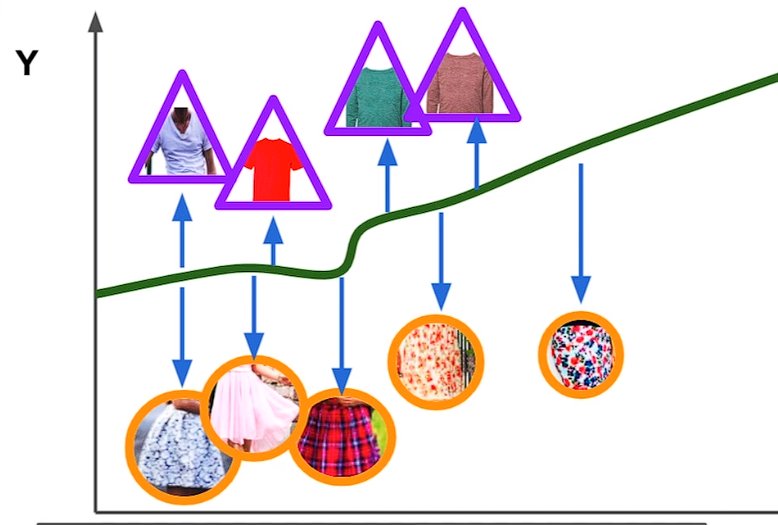

Aqui há uma imagem didática que representa o que o modelo de redes neurais faz, no que se refere a uma classificação, por baixo dos panos. As setas em azul indicam o viés. Nota-se que a seta é menor para camisa e itens que sejam próximas da categoria camisa, o que pode indicar que essa função esteja buscando, se não o item camisa, algo que lhe é próximo.

Mas e os pesos ? Bom os pesos são justamente os coeficientes que criam esse traçado verde que é possível de ser visto, a função matemática. Nesse cenário, o viés também participa da função matemática, mas da sua "movimentação" no eixo y, ajustando a função para ficar mais próxima ou distante do item.

O viés, na equação, "indica" ao modelo o quão próximo está um item ou distante daquilo que foi previso em relação ao resultado, o qual, por meio dos pesos, faz com que o traçado se aproxime do item correto, distanciando-se do errado.

### Mas e as funções de ativação❓

Vimos os pesos e os viéses, o que cada qual influe no modelo, mas e as funções de ativação ? Elas fazem algo com os pesos e os modelos ? O que realmente fazem ?

Então, de forma sintética, podemos ver o que as funções de ativação fazem por meio da fórmula matemática abaixo:

`funcaoAtivação = [(entrada*pesos) + viés]`

Adaptando ao presente projeto:

`relu = [(input*kernel) + bias]`

Generalizando:

`y = [(I * W) + b]`

Como as fórmulas torna-se possível visualizar, as funções de ativação, tais como a reLu, basicamente realizam o produto das entradas com o peso, somando mais o viés, de modo que produzem uma nova saída com isso. Esse processo sendo executado "n" vezes garante que, mediante a atualização dos pesos via o gradiente descendente e a loss, o modelo vai se ajustando, fazendo com que a rede aprenda. Em síntese, trata-se de um produto entre matrizes, mais soma.

### Gradiente descendente 🌈

O gradiente descendente é basicamente a derivada da loss, encontrada por meio da diferença dos resultados esperados pelo valor gerado pelo modelo, via a função matemática que o compõe - o qual pode ser entendido nesse cenário, como a sua função de perda.

O gradiente informa qual é o erro mínimo possível que o modelo pode encontrar, como se fosse o ponto ótimo no qual há o menor erro e, portanto, dialéticamente, o maior acerto.

No contexto do gradiente, normalmente, a taxa de aprendizagem (também conhecido como passo de aprendizagem ou momentum) o acompanha, o qual determina a velocidade com a qual o modelo buscará convergir no gradiente, isto é, no ponto em que há o menor erro.

O momentum é um hiperparâmetro, sujeito a escolha do desenvolvedor. Se ele for muito rápido, o modelo pode oscilar e não conseguir convegir no ponto de menor erro ou, se for muito demorado, pode demorar demais para convergir. Portanto, o ideal é não ser tão rápido e nem tão lento. Ainda nesse cenário, há aquilo que se conhece como mínimo local e mínimo global.

O mínimo local é um ponto em que, de fato, há uma menor perda, porém não é a menor perda possível ao modelo, sendo que o mínimo global sim. Quem cuida da "checagem" de se encontrou-se na verdade um mínimo local ou global são os otimizadores, como o **Adam**, que cuidam desse processo, de modo que irão ignorar o mínimo local e buscar o mínimo global.

É mediante ao produto do gradiente pela momentum, se esse houver, que os pesos são atualizados, os quais são os coeficientes da função matemática que, associados à entrada, ajustam o modelo. Podemos compreender isso mediante a equação abaixo:

> Legenda:

- W_final e W_incial = peso final e peso inicial;
- a = alpha - indica o momentum;
- loss' = a derivada da perda, portanto o gradiente descendente

`W_final = W_inicial - (a * loss')`

### Entendendo como a rede, na etapa de treinamento, aprende 🧠💪

Para realizar essa compreensão, vale construirmos um raciocínio sobre o que significa aprender. O que é aprender ? Normalmente, diz-se que a pessoa aprendeu algo quando essa o acerta, mas também quando esse passa emular determinado comportamento, operação que lhe fora apresentado ou por ela assimilado e etc.

>

Nesse cenário de assimilação de comportamento há uma componente de ressonância, pois do contrário não seria ressonante, isto é, semelhante, mas diferente. Estar ressonante significa estar junto, que pode ser lido como equivalente. Se algo é equivalente a outro significa que não são diferentes.

>

Quando acertamos algo, o valor a nós previsto é equivalente ao resultado esperado - ressonante. Portanto, estar certo significa dizer ser equivalente. Portanto aprender significa conceber valores que sejam equivalentes a algo tido como referência e/ou esperado.

>

Estar certo significa não estar errado, de modo que acertar implica em não errar. Se não errar pode significar acertar, então à medida que procuro errar menos, implica, dialéticamente, que estou acertando mais, certo ?

>

É segundo essa lógica, de buscar o menor erro, que as redes neurais e o machine learning clássico é estabelecido. Os pesos e viés são na verdade os coeficientes que criam a função matemática, de modo que a primeira multiplica os dados de entrada da rede, enquanto que a segunda soma o resultado dessa multiplicação - em certa medida, circunscrito a essa esfera, posso pensar que os pesos são os coeficientes angulares, ao passo que o viés é o coeficiente linear ou interceptor de y.

>

É a partir dessa função matemática, mediante às entradas (e mesmo se não houver entrada a presença do viés, se estiver presente, garante a formação de algum valor de saída) que promove ao modelo a capacidade de gerar valores que são comparados em relação aos resultados esperados, de modo que pela diferença do esperado com o previsto encontramos a perda.

>

Essa função matemática se relaciona às funções de ativação, as quais são capazes de alterar a simetria do modelo, criando funções complexas que conseguem aprender em contextos complexos, que somente com uma função linear não seria possível. Portanto, são as funções de ativação que produzem a função que irá produzir um valor que ao final será comparado com o esperado, obtendo assim, pela diferença, a loss.

>

Para que ocorra o aprendizado é necessário que, a partir da loss encontrada, o modelo busque reduzi-la, o que é realizado mediante ao processo do *backpropagation*, o qual, através do gradiente descendente (a derivada da loss), junto, se houver, da taxa de aprendizagem, atualizam os pesos da função matemática, realizando o ajuste até um ponto no qual a perda seja a menor possível - mínimo global.

>

Quando chegamos a menor perda possível, significa que encontramos o ponto de maior acerto possível. Se acertar também pode ser visto como aprender, então, nesse cenário, chegamos ao ponto no qual o modelo aprendeu, ou, pelo menos, aprendeu mais.

### Visualizando o código que explicita os parâmetros que constrói a rede neural 👁️‍🗨️

`keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)`

### Compilando o modelo após o entendimento da etapa de treinamento e adicionando hiperparâmetros 🧪

In [29]:
# Importar a biblioteca TensorFlow e Keras
import tensorflow as tf
from tensorflow import keras

# Definir o modelo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Definindo o otimizador:
adam = keras.optimizers.Adam(learning_rate=0.002)

# Definir os callbacks

# Criando um retornos que finalizam o treinamento do modelo à medida
# que o algoritmo concebe que, com base na 'val_loss', não está apresentando
# mais redução da perda, com uma "paciência" (patience) de 3, o que significa
# que o modelo irá permitir a criação de mais três épocas a partir do ponto
# no qual ele concebe que não há mais redução da perda.

# Além disso, estou passando um checkpoint que permite salvar o melhor
# modelo, seus pesos e vies.

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
    keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.h5', monitor='val_loss', save_best_only=True)
]

# Compilar o modelo
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
historico = modelo.fit(X_train, y_train,
                       batch_size=150, epochs=6,
                       validation_split=0.2, callbacks=callbacks)

# Salvar o melhor modelo
modelo.save('my_model.keras')


Epoch 1/6
320/320 [==============================] - 4s 9ms/step - loss: 0.5510 - accuracy: 0.8039 - val_loss: 0.4154 - val_accuracy: 0.8508
Epoch 2/6
320/320 [==============================] - 4s 12ms/step - loss: 0.4036 - accuracy: 0.8556 - val_loss: 0.3789 - val_accuracy: 0.8633
Epoch 3/6
320/320 [==============================] - 3s 8ms/step - loss: 0.3689 - accuracy: 0.8651 - val_loss: 0.3534 - val_accuracy: 0.8719
Epoch 4/6
320/320 [==============================] - 3s 8ms/step - loss: 0.3425 - accuracy: 0.8747 - val_loss: 0.3479 - val_accuracy: 0.8717
Epoch 5/6
320/320 [==============================] - 3s 8ms/step - loss: 0.3285 - accuracy: 0.8778 - val_loss: 0.3575 - val_accuracy: 0.8702
Epoch 6/6
320/320 [==============================] - 3s 11ms/step - loss: 0.3148 - accuracy: 0.8837 - val_loss: 0.3216 - val_accuracy: 0.8848


In [32]:
# Carregando o melhor modelo:
load_model = load_model('melhor_modelo.h5')

# Visualizar a arquitetura do modelo
load_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Visualizar os pesos e viés do melhor modelo :

pesos = load_model.layers[1].get_weights()[0]
vies = load_model.layers[1].get_weights()[1]

In [34]:
pesos

array([[-0.00893593, -0.04778596,  0.01016672, ..., -0.10159469,
         0.00062618,  0.03755555],
       [-0.13803747,  0.05205139, -0.05326021, ...,  0.12053584,
        -0.07121032, -0.0295996 ],
       [-0.13859276,  0.1179902 , -0.03025215, ...,  0.22040235,
        -0.0649287 , -0.03319282],
       ...,
       [-0.15076967,  0.01227344, -0.01424898, ...,  0.10094712,
        -0.0121393 , -0.04038557],
       [-0.13771248, -0.24729887,  0.13150677, ..., -0.17791347,
        -0.0743259 , -0.08345432],
       [-0.08520959,  0.04413394, -0.01602025, ..., -0.11871742,
        -0.05225259, -0.02044649]], dtype=float32)

In [35]:
vies

array([-0.05336913,  0.26979437, -0.08722433, -0.01299746,  0.18097365,
        0.20322001,  0.26421258,  0.02565879,  0.15826166, -0.01493443,
       -0.30323187,  0.37351677,  0.28471312,  0.16909026,  0.17790076,
        0.01126612, -0.01724839,  0.29918388,  0.02188809,  0.01986778,
       -0.01644087,  0.27605435,  0.3596111 , -0.01069352, -0.01199684,
        0.32457396,  0.32995057,  0.20577857, -0.19931664,  0.05992072,
        0.10770541,  0.20912975, -0.01193795, -0.03755895,  0.2727924 ,
       -0.08603105,  0.23815313,  0.36020088, -0.2718518 ,  0.35021594,
        0.12577175,  0.05276186, -0.18482596, -0.24323854, -0.02168275,
        0.17389515, -0.23168837, -0.04721044,  0.05005017,  0.18582074,
        0.0164836 , -0.0368895 , -0.10766151,  0.08430538, -0.02225383,
        0.3404039 ,  0.05584612,  0.13826765,  0.26901838,  0.29723927,
        0.13565776,  0.07887399,  0.1617063 ,  0.4324582 , -0.02176525,
       -0.01466083, -0.0297177 ,  0.23444033,  0.13507818,  0.05